In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./resources/hawaii.sqlite")
engine

Engine(sqlite:///./resources/hawaii.sqlite)

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [14]:
all_data = session.query(Measurement)

In [15]:

measurement_dates = []

for rec in all_data:
    measurement_dates.append(rec.date)
most_recent_date = min(measurement_dates)
print("The latest date recorded was :" + most_recent_date)
first_row=session.query(Measurement).first()
print("The latest record has a date of :" + first_row.date)

The latest date recorded was :2010-01-01
The latest record has a date of :2010-01-01


In [16]:
all_station = session.query(Station)
for station in all_station:
    id = station.id
    name = station.station
    station_val = station.name
    print(f"ID {station.id}  station {station.station} name {station.name}")


ID 1  station USC00519397 name WAIKIKI 717.2, HI US
ID 2  station USC00513117 name KANEOHE 838.1, HI US
ID 3  station USC00514830 name KUALOA RANCH HEADQUARTERS 886.9, HI US
ID 4  station USC00517948 name PEARL CITY, HI US
ID 5  station USC00518838 name UPPER WAHIAWA 874.3, HI US
ID 6  station USC00519523 name WAIMANALO EXPERIMENTAL FARM, HI US
ID 7  station USC00519281 name WAIHEE 837.5, HI US
ID 8  station USC00511918 name HONOLULU OBSERVATORY 702.2, HI US
ID 9  station USC00516128 name MANOA LYON ARBO 785.2, HI US


In [17]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
latest_date_dt = dt.datetime.strptime(latest_date,'%Y-%m-%d')

print("Most recent Date:",latest_date_dt)


Most recent Date: 2017-08-23 00:00:00


In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.


# Calculate the date one year from the last date in data set.
one_year_bac = latest_date_dt - dt.timedelta(days=365)
print("One year back :" , one_year_bac)

One year back : 2016-08-23 00:00:00


In [19]:
# Perform a query to retrieve the data and precipitation scores
results=session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).\
    filter(Measurement.date > one_year_bac).all()
print(results)

[('2017-08-23', 0.0), ('2017-08-23', 0.0), ('2017-08-23', 0.08), ('2017-08-23', 0.45), ('2017-08-22', 0.0), ('2017-08-22', 0.0), ('2017-08-22', 0.5), ('2017-08-21', 0.0), ('2017-08-21', 0.02), ('2017-08-21', None), ('2017-08-21', 0.56), ('2017-08-20', 0.0), ('2017-08-20', 0.01), ('2017-08-20', None), ('2017-08-19', 0.0), ('2017-08-19', 0.0), ('2017-08-19', None), ('2017-08-19', 0.09), ('2017-08-18', 0.0), ('2017-08-18', 0.0), ('2017-08-18', 0.06), ('2017-08-18', None), ('2017-08-17', 0.0), ('2017-08-17', 0.05), ('2017-08-17', 0.01), ('2017-08-17', 0.13), ('2017-08-16', 0.0), ('2017-08-16', 0.07), ('2017-08-16', 0.12), ('2017-08-16', 0.42), ('2017-08-15', 0.02), ('2017-08-15', 0.0), ('2017-08-15', 0.06), ('2017-08-15', 0.32), ('2017-08-15', 0.42), ('2017-08-14', 0.0), ('2017-08-14', 0.01), ('2017-08-14', 0.08), ('2017-08-14', 0.0), ('2017-08-14', 0.22), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-13', 0.0), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-12', 0.0), ('2017-

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results[:], columns=['Date', 'Inches'])
df_clean = df.dropna()
df_day_precip = df_clean.groupby(['Date']).mean()
df_day_precip

,Inches
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


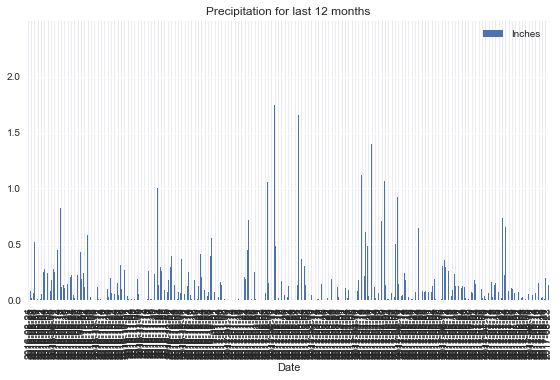

In [21]:
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
df_day_precip.plot.bar(title="Precipitation for last 12 months")
plt.tight_layout()
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_day_precip.describe()

,Inches
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Measurement.station)).all()

[(19550,)]

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

('USC00519281', 2772)

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_max_avg = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281')
for rec in min_max_avg:
    print(f"Min : {rec[0]} Max : {rec[1]} Avg : {rec[2]}")

Min : 54.0 Max : 85.0 Avg : 71.66378066378067


In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_stn_temps = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')
tempdf = pd.DataFrame(active_stn_temps[:], columns=["Temperatures"])
tempdf.head()

,Temperatures
0,70.0
1,62.0
2,74.0
3,75.0
4,74.0


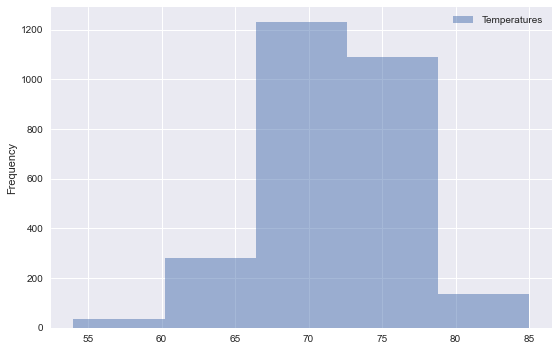

In [27]:
ax = tempdf.plot.hist(bins=5, alpha=.5)

# Close Session

In [28]:
session.close()